### APPLIANCE ENERGY PREDICTION 

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, skew, normaltest

In [3]:
df = pd.read_csv('appliances_energy_prediction.csv')
df

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,2016-01-1117:00:00,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,45.5300,6.60,733.5,92.000000,7.000000,63.000000,5.3,13.275433,13.275433,60
1,2016-01-1117:10:00,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,45.5600,6.48,733.6,92.000000,6.666667,59.166667,5.2,18.606195,18.606195,60
2,2016-01-1117:20:00,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,45.5000,6.37,733.7,92.000000,6.333333,55.333333,5.1,28.642668,28.642668,50
3,2016-01-1117:30:00,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,45.4000,6.25,733.8,92.000000,6.000000,51.500000,5.0,45.410390,45.410390,50
4,2016-01-1117:40:00,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,45.4000,6.13,733.9,92.000000,5.666667,47.666667,4.9,10.084097,10.084097,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-2717:20:00,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,46.7900,22.70,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812,100
19731,2016-05-2717:30:00,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,46.7900,22.60,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940,90
19732,2016-05-2717:40:00,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,46.7900,22.50,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117,270
19733,2016-05-2717:50:00,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,46.8175,22.30,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784,420


In [5]:
# info about database
df.info

<bound method DataFrame.info of                      date  lights         T1       RH_1         T2       RH_2  \
0      2016-01-1117:00:00      30  19.890000  47.596667  19.200000  44.790000   
1      2016-01-1117:10:00      30  19.890000  46.693333  19.200000  44.722500   
2      2016-01-1117:20:00      30  19.890000  46.300000  19.200000  44.626667   
3      2016-01-1117:30:00      40  19.890000  46.066667  19.200000  44.590000   
4      2016-01-1117:40:00      40  19.890000  46.333333  19.200000  44.530000   
...                   ...     ...        ...        ...        ...        ...   
19730  2016-05-2717:20:00       0  25.566667  46.560000  25.890000  42.025714   
19731  2016-05-2717:30:00       0  25.500000  46.500000  25.754000  42.080000   
19732  2016-05-2717:40:00      10  25.500000  46.596667  25.628571  42.768571   
19733  2016-05-2717:50:00      10  25.500000  46.990000  25.414000  43.036000   
19734  2016-05-2718:00:00      10  25.500000  46.600000  25.264286  42.971429

In [7]:
#to get the shape of dataframe (rows x columns)
df.shape

(19735, 29)

In [9]:
# to view the first 5 rows as default
df.head()

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,2016-01-1117:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,60
1,2016-01-1117:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,60
2,2016-01-1117:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,50
3,2016-01-1117:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390,50
4,2016-01-1117:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,60


In [11]:
# to view first any number of rows
df.head(3)

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,2016-01-1117:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,60
1,2016-01-1117:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,60
2,2016-01-1117:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,50


In [13]:
# to view the last 5 as default
df.tail()

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
19730,2016-05-2717:20:00,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,...,46.7900,22.7,755.2,55.666667,3.333333,23.666667,13.3,43.096812,43.096812,100
19731,2016-05-2717:30:00,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,...,46.7900,22.6,755.2,56.000000,3.500000,24.500000,13.3,49.282940,49.282940,90
19732,2016-05-2717:40:00,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,46.7900,22.5,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117,270
19733,2016-05-2717:50:00,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,46.8175,22.3,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784,420
19734,2016-05-2718:00:00,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,46.8450,22.2,755.2,57.000000,4.000000,27.000000,13.2,34.118851,34.118851,430


In [15]:
# to viey any number of last rows
df.tail(3)

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
19732,2016-05-2717:40:00,10,25.5,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,...,46.7900,22.5,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117,270
19733,2016-05-2717:50:00,10,25.5,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,...,46.8175,22.3,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784,420
19734,2016-05-2718:00:00,10,25.5,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,...,46.8450,22.2,755.2,57.000000,4.000000,27.000000,13.2,34.118851,34.118851,430


In [17]:
# to view any rows in between
# rows 20 to 30
df.iloc[20:31]

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
20,2016-01-1120:20:00,20,20.890000,48.433333,20.200000,45.722500,20.166667,47.300000,19.175000,49.947500,...,45.126667,6.00,735.266667,87.666667,6.0,40.0,4.03,46.735262,46.735262,120
21,2016-01-1120:30:00,40,20.963333,47.633333,20.260000,45.530000,20.200000,47.026667,19.260000,49.696667,...,45.126667,6.00,735.300000,87.500000,6.0,40.0,4.00,10.607126,10.607126,190
22,2016-01-1120:40:00,40,21.033333,47.063333,20.290000,45.223333,20.260000,46.826667,19.323333,49.166667,...,45.060000,6.00,735.333333,87.333333,6.0,40.0,3.97,32.583688,32.583688,110
23,2016-01-1120:50:00,40,21.100000,46.596667,20.356667,44.963333,20.290000,46.633333,19.390000,48.426667,...,45.000000,6.00,735.366667,87.166667,6.0,40.0,3.93,6.277755,6.277755,110
24,2016-01-1121:00:00,30,21.133333,46.060000,20.426667,44.760000,20.290000,46.433333,19.390000,48.193333,...,44.966667,6.00,735.400000,87.000000,6.0,40.0,3.90,13.361033,13.361033,110
25,2016-01-1121:10:00,20,21.200000,45.800000,20.500000,44.760000,20.390000,46.223333,19.390000,47.800000,...,44.900000,5.93,735.466667,87.166667,6.0,40.0,3.87,19.305705,19.305705,110
26,2016-01-1121:20:00,30,21.290000,45.900000,20.533333,45.090000,20.390000,46.090000,19.390000,47.560000,...,44.790000,5.87,735.533333,87.333333,6.0,40.0,3.83,0.669517,0.669517,100
27,2016-01-1121:30:00,20,21.356667,45.826667,20.666667,45.163333,20.390000,46.090000,19.390000,47.500000,...,44.790000,5.80,735.600000,87.500000,6.0,40.0,3.80,19.119398,19.119398,100
28,2016-01-1121:40:00,20,21.390000,45.690000,20.700000,45.060000,20.390000,46.090000,19.426667,47.993333,...,44.700000,5.73,735.666667,87.666667,6.0,40.0,3.77,43.484542,43.484542,100
29,2016-01-1121:50:00,20,21.500000,45.333333,20.700000,44.933333,20.390000,46.060000,19.566667,48.466667,...,44.700000,5.67,735.733333,87.833333,6.0,40.0,3.73,17.017450,17.017450,100


In [19]:
# to view columns
df.columns

Index(['date', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2', 'Appliances'],
      dtype='object')

In [21]:
# to view any particular column only
# Visibility
df['Visibility'].head()

0    63.000000
1    59.166667
2    55.333333
3    51.500000
4    47.666667
Name: Visibility, dtype: float64

In [23]:
# to know how many unique values in a column
# unique
# here the Windspeed column

df['Windspeed'].unique()

array([ 7.        ,  6.66666667,  6.33333333,  6.        ,  5.66666667,
        5.33333333,  5.        ,  5.16666667,  5.5       ,  5.83333333,
        6.16666667,  6.5       ,  6.83333333,  4.83333333,  4.66666667,
        4.5       ,  4.33333333,  4.16666667,  4.        ,  7.16666667,
        7.33333333,  7.5       ,  7.66666667,  7.83333333,  8.        ,
        3.83333333,  3.66666667,  3.5       ,  3.33333333,  3.16666667,
        3.        ,  8.33333333,  9.        ,  8.83333333,  8.66666667,
        8.5       ,  8.16666667,  9.33333333,  9.66666667, 10.        ,
        9.16666667,  9.5       ,  9.83333333, 10.16666667, 10.33333333,
       10.5       , 10.66666667, 10.83333333, 11.        ,  2.5       ,
        2.        ,  2.16666667,  2.33333333,  2.66666667,  2.83333333,
        1.66666667,  1.33333333,  1.        ,  1.83333333,  1.5       ,
        1.16666667,  0.83333333,  0.66666667,  0.5       ,  0.33333333,
        0.16666667,  0.        ,  1.94444444,  1.88888889,  1.77

In [25]:
# to know how many number of unique values
# Windspeed column

df.Windspeed.nunique()

189

In [27]:
# to get the count of each unique value

df['Windspeed'].value_counts()

Windspeed
1.000000    2133
2.000000    2007
3.000000    1707
4.000000    1594
5.000000    1084
            ... 
4.857143       1
5.142857       1
5.285714       1
5.428571       1
1.083333       1
Name: count, Length: 189, dtype: int64

In [29]:
# Checking for Missing values
df.isnull().sum()

date           0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
Appliances     0
dtype: int64

In [31]:
# checking for duplicates
df.duplicated().sum()

0

In [33]:
# Drop unnecessary columns
df = df.drop(columns=['rv1', 'rv2', 'Visibility', 'Tdewpoint'])


In [35]:
df.head()

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Appliances
0,2016-01-1117:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,41.626667,18.2,48.900000,17.033333,45.53,6.60,733.5,92.0,7.000000,60
1,2016-01-1117:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,41.560000,18.2,48.863333,17.066667,45.56,6.48,733.6,92.0,6.666667,60
2,2016-01-1117:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,41.433333,18.2,48.730000,17.000000,45.50,6.37,733.7,92.0,6.333333,50
3,2016-01-1117:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,41.290000,18.1,48.590000,17.000000,45.40,6.25,733.8,92.0,6.000000,50
4,2016-01-1117:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,41.230000,18.1,48.590000,17.000000,45.40,6.13,733.9,92.0,5.666667,60


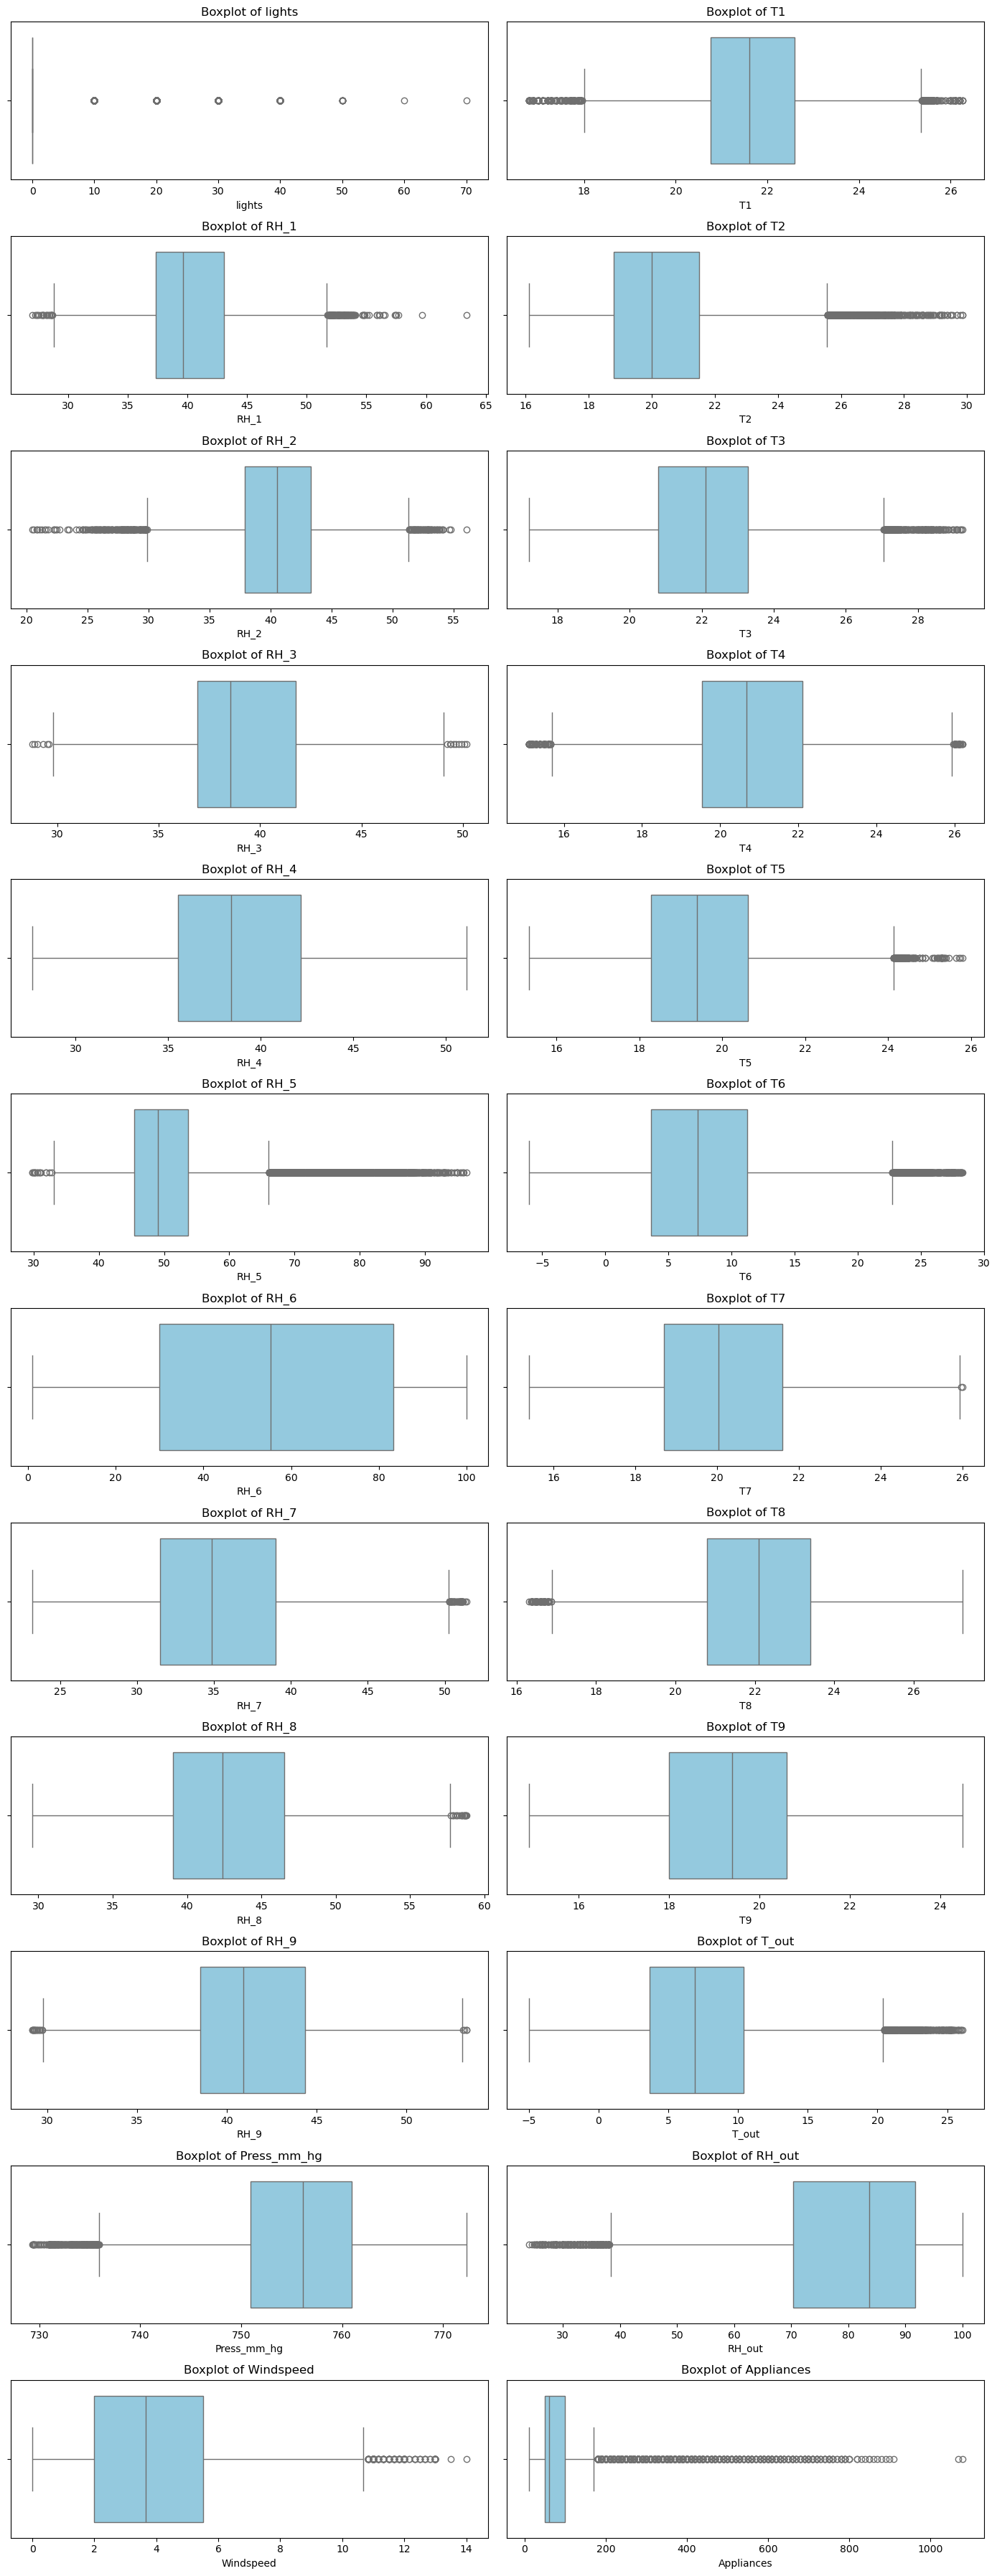

In [37]:
#using box plot technique detecting outliers

# 1. Select only numeric (continuous) columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 2. Set up the layout — 2 plots per row
n_cols = 2
n_rows = (len(numeric_cols) + 1) // n_cols  # Ceiling division

# 3. Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))
axes = axes.flatten()  # Flatten to 1D array for easy iteration

# 4. Generate boxplots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col].dropna(), ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}')

# 5. Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [39]:
# numerical stats summary
df.describe()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Appliances
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,35.388200,22.029107,42.936165,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,97.694958
std,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,5.114208,1.956162,5.224361,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,102.524891
min,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,10.000000
25%,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,31.500000,20.790000,39.066667,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,50.000000
50%,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,34.863333,22.100000,42.375000,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,60.000000
75%,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,39.000000,23.390000,46.536000,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,100.000000
max,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,1080.000000


#### HISTOGRAM VISULAIZATION

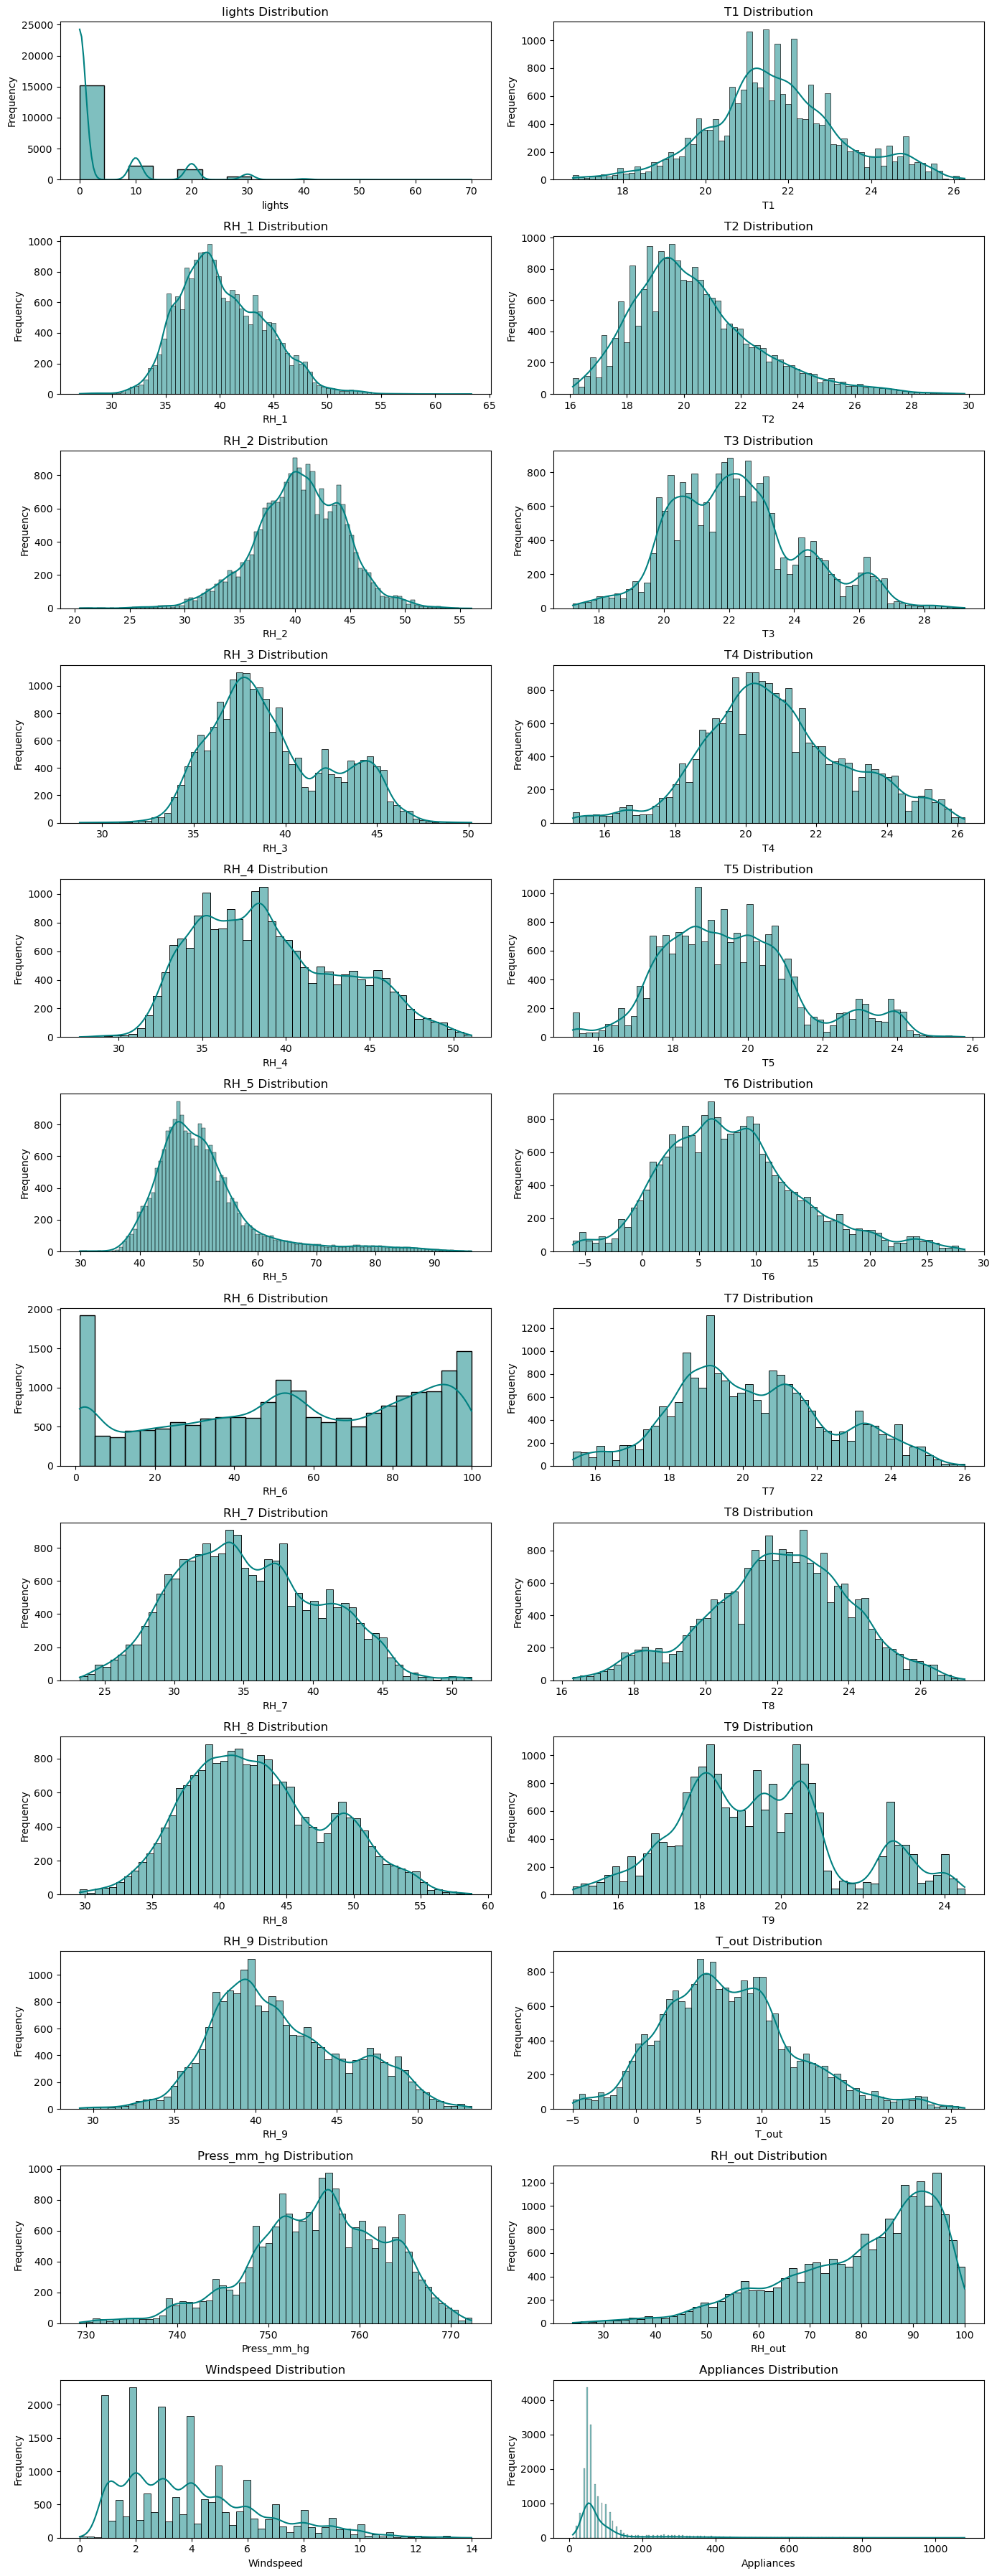

In [41]:
import math

# 1. Select all numeric columns (like you did for boxplots)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# 2. Set layout (2 plots per row)
n_cols = 2
n_rows = math.ceil(len(numeric_cols) / n_cols)

# 3. Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, n_rows * 3))
axes = axes.flatten()

# 4. Plot histograms with KDE
for i, col in enumerate(numeric_cols):
    sns.histplot(x=df[col].dropna(), kde=True, ax=axes[i], color='teal')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

# 5. Hide unused subplots if number of plots is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### HANDLE OUTLIERS

In [43]:
def treat_outliers_iqr(df, col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"\nColumn: {col}")
    print('Lower bound is:', round(lower_bound, 2))
    print('Upper bound is:', round(upper_bound, 2))

    # Cap the outliers
    df[col] = df[col].apply(
        lambda x: lower_bound if x < lower_bound 
        else upper_bound if x > upper_bound 
        else x
    )
    return df


In [45]:
columns_to_treat = ['Press_mm_hg', 'Windspeed', 'RH_out', 'RH_5']

for col in columns_to_treat:
    df = treat_outliers_iqr(df, col)



Column: Press_mm_hg
Lower bound is: 735.93
Upper bound is: 775.93

Column: Windspeed
Lower bound is: -3.25
Upper bound is: 10.75

Column: RH_out
Lower bound is: 38.33
Upper bound is: 123.67

Column: RH_5
Lower bound is: 33.01
Upper bound is: 66.06


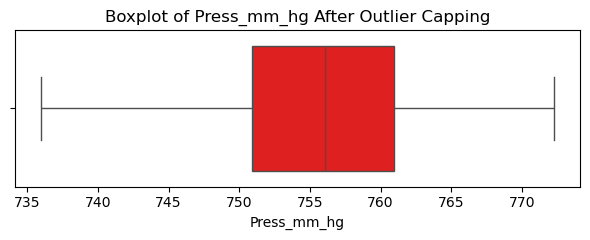

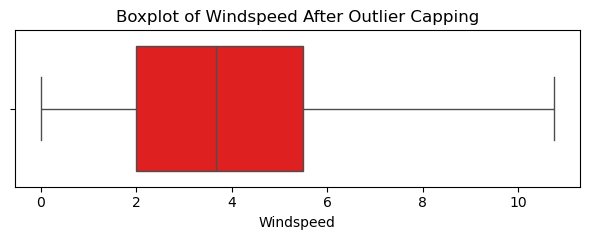

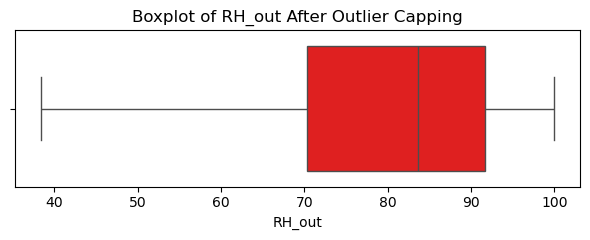

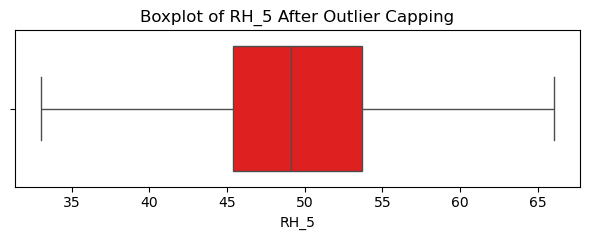

In [47]:
#Box plotting the capped values
# Columns where you applied IQR capping
columns_to_treat = ['Press_mm_hg', 'Windspeed', 'RH_out', 'RH_5']

# Plot boxplots after capping
for col in columns_to_treat:
    plt.figure(figsize=(6, 2.5))
    sns.boxplot(x=df[col], color='red')
    plt.title(f'Boxplot of {col} After Outlier Capping')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [49]:
# Testing for skewness
print('Skewness before Transformation')
print(df[['lights', 'RH_6', 'Windspeed', 'RH_out', 'Appliances']
].apply(skew))

Skewness before Transformation
lights        2.194988
RH_6         -0.241943
Windspeed     0.790070
RH_out       -0.846189
Appliances    3.386110
dtype: float64


In [51]:
# Applying log1p transformation to reduce skewness
df['lights_log']     = np.log1p(df['lights'])
df['RH_6_log']       = np.log1p(df['RH_6'])
df['Windspeed_log']  = np.log1p(df['Windspeed'])
df['RH_out_log']     = np.log1p(df['RH_out'])
df['Appliances_log'] = np.log1p(df['Appliances'])


In [53]:
# Testing for skewness after transformation
print('Skewness After Transformation')
print(df[['lights_log','RH_6_log','Windspeed_log','RH_out_log','Appliances_log']].apply(skew))

Skewness After Transformation
lights_log        1.402580
RH_6_log         -1.666535
Windspeed_log    -0.060629
RH_out_log       -1.282178
Appliances_log    1.190202
dtype: float64


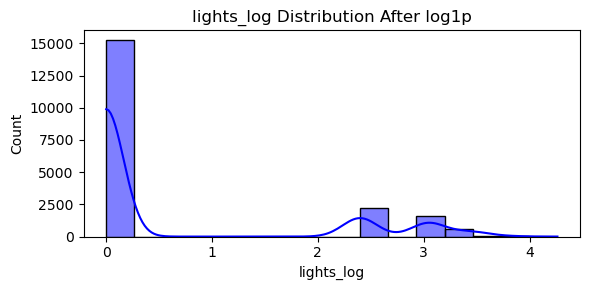

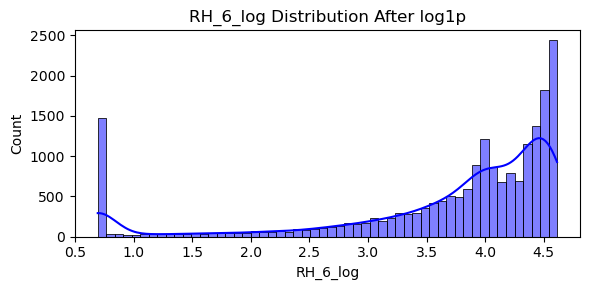

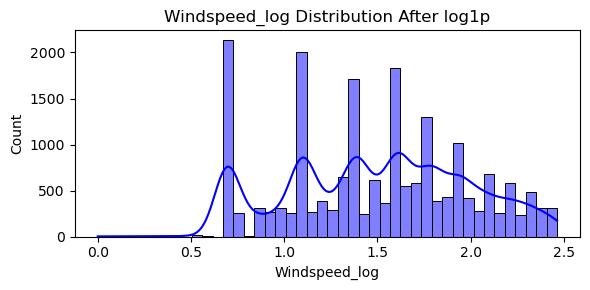

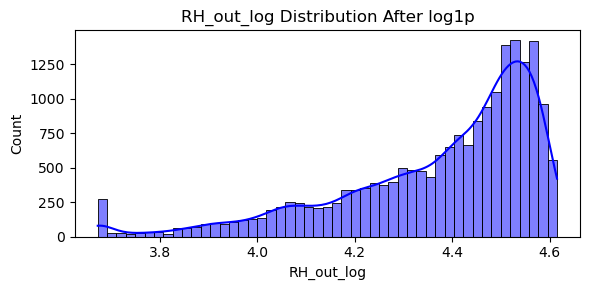

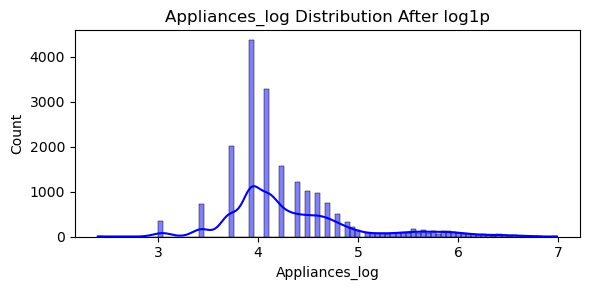

In [55]:
#Visulaization of after skewness

log_cols = ['lights_log', 'RH_6_log', 'Windspeed_log', 'RH_out_log', 'Appliances_log']

for col in log_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'{col} Distribution After log1p')
    plt.tight_layout()
    plt.show()


### FEATURE ENGINEERING

In [57]:
df.select_dtypes(include='object').columns


Index(['date'], dtype='object')

In [59]:
# Fix the date format by inserting a space between date and time
df['date'] = df['date'].str.replace(r'(\d{4}-\d{2}-\d{2})(\d{2}:\d{2}:\d{2})', r'\1 \2', regex=True)

# convert to datetime fromat
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')


In [61]:
# Extract temporal features
df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday  # 0=Monday, 6=Sunday
df['month'] = df['date'].dt.month


In [63]:
# Drop the original datetime column
df.drop('date', axis=1, inplace=True)


In [65]:
print(df.columns.tolist())


['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Appliances', 'lights_log', 'RH_6_log', 'Windspeed_log', 'RH_out_log', 'Appliances_log', 'hour', 'day', 'weekday', 'month']


### Correlation Matrix

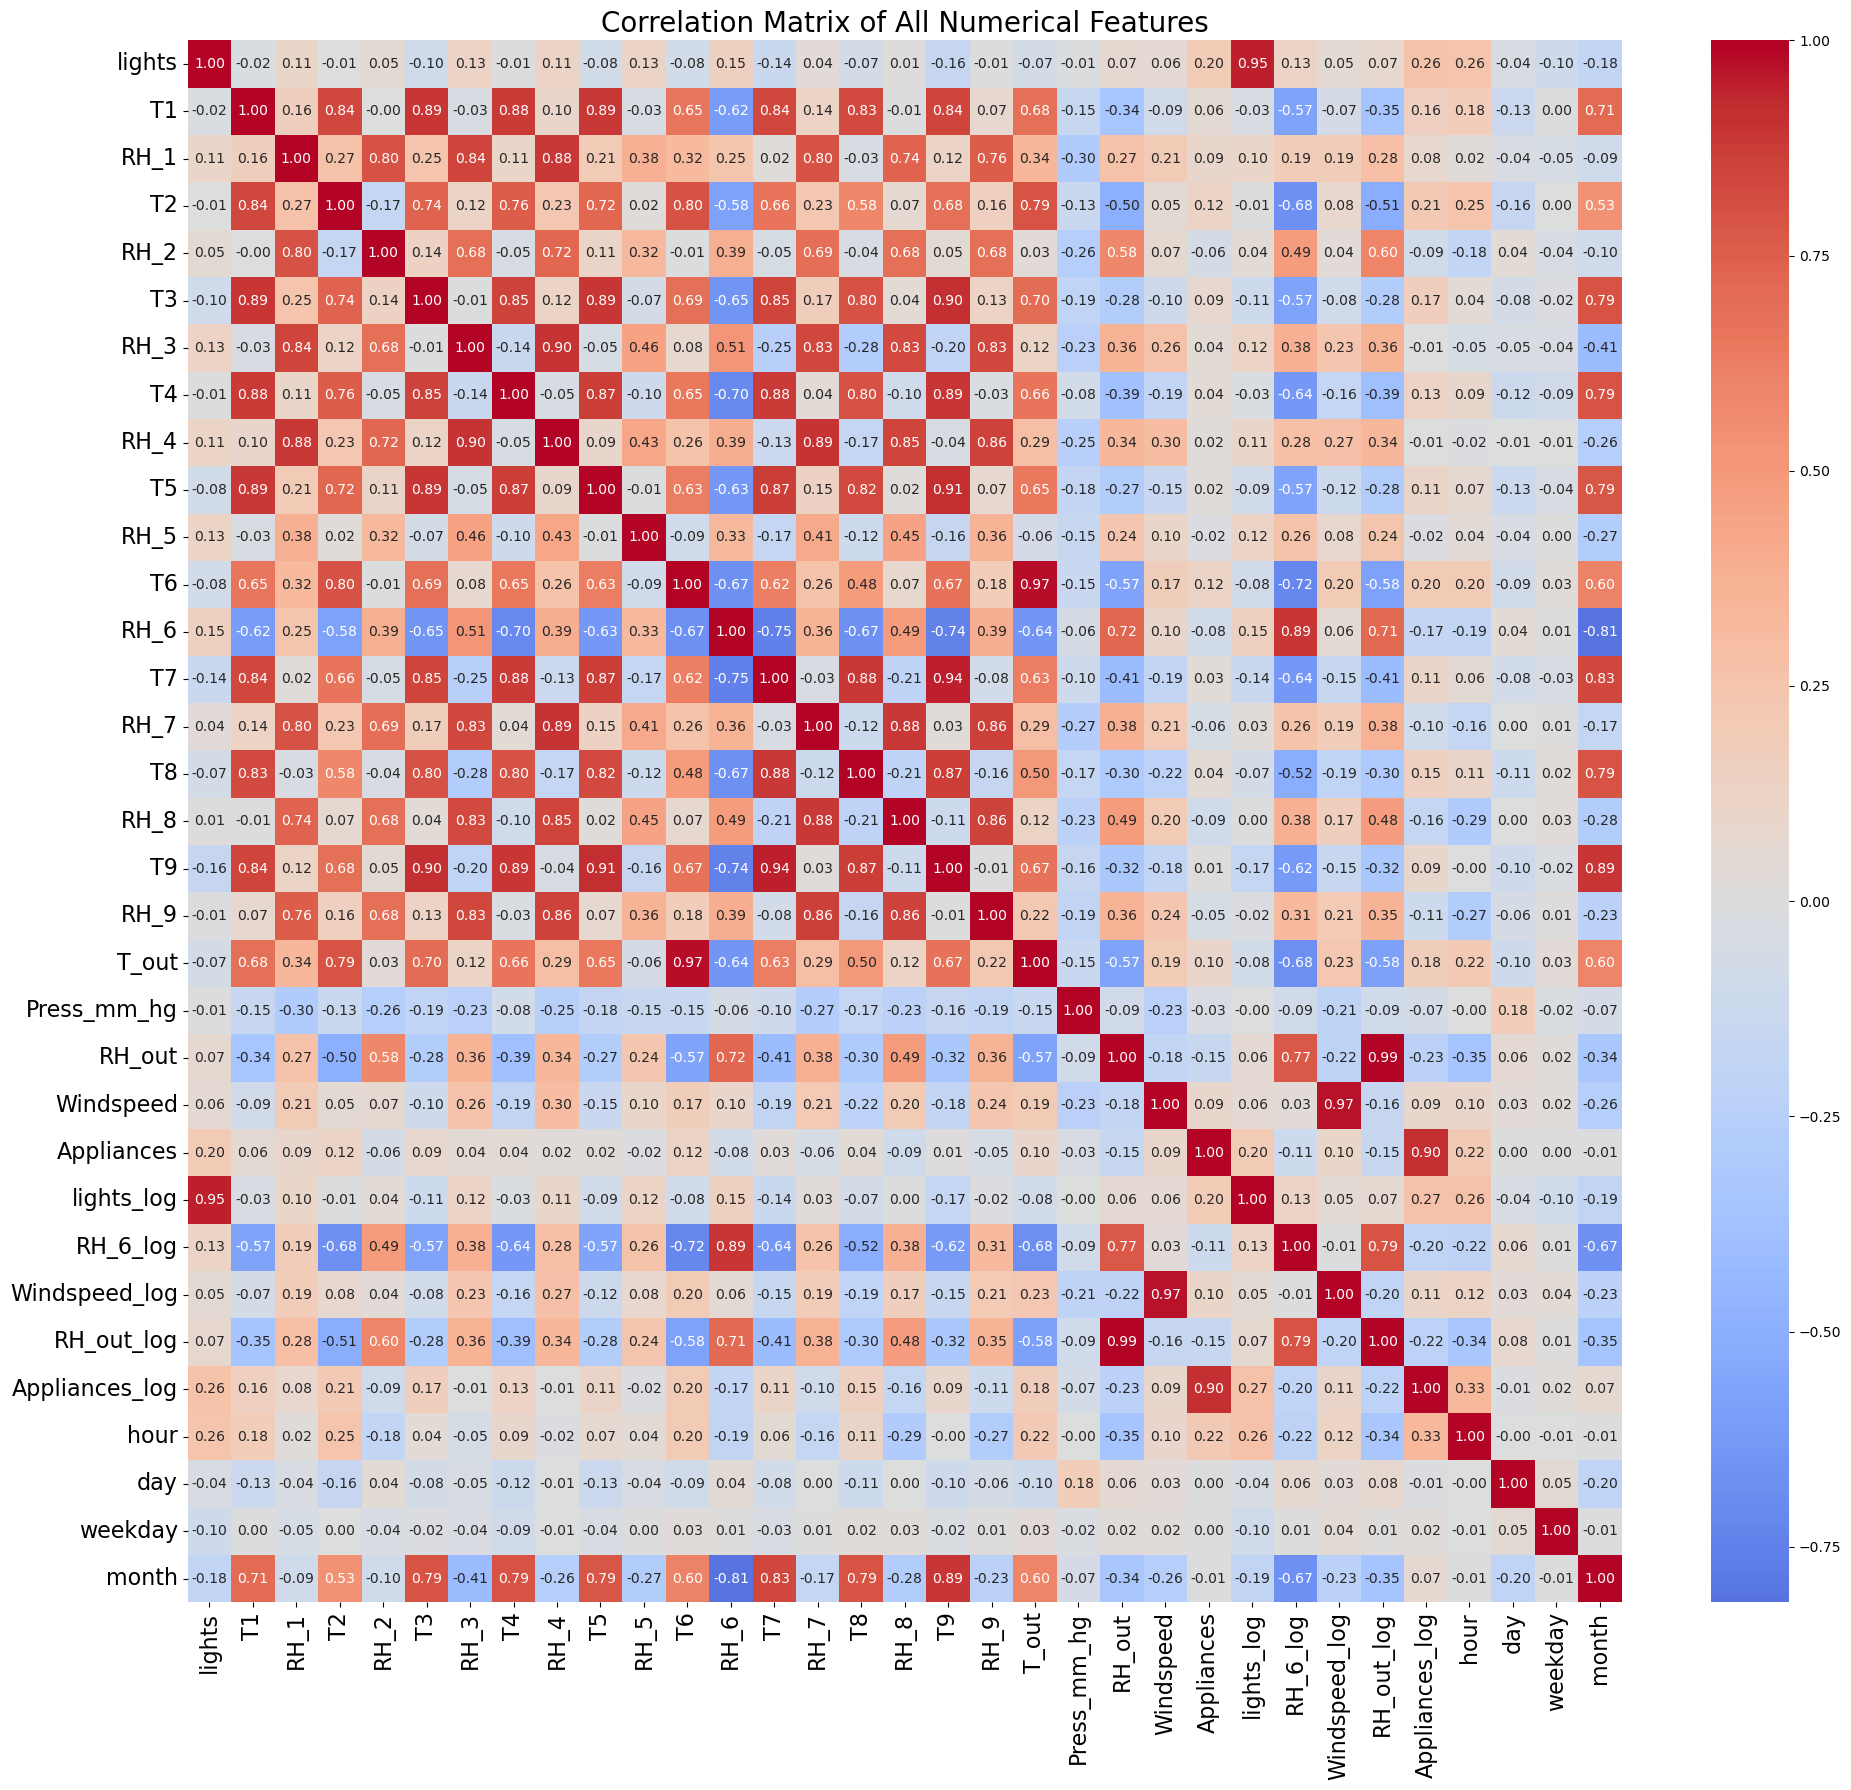

In [67]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Visualize the correlation heatmap
# Set figure size
plt.figure(figsize=(20, 18))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=16)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=16)
plt.title("Correlation Matrix of All Numerical Features", fontsize=20)

# Show plot
plt.tight_layout()
plt.show()


In [69]:
# Drop highly correlated or redundant features (example)
df.drop(columns=['T2', 'RH_2', 'T5', 'RH_9'], inplace=True)


### FEATURE SCALING

In [71]:
X = df.drop(columns=['Appliances', 'Appliances_log']) 
y = df['Appliances_log']  


### SPLITTING THE DATASET

In [73]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [75]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
X_train.head()

,lights,T1,RH_1,T3,RH_3,T4,RH_4,RH_5,T6,RH_6,...,RH_out,Windspeed,lights_log,RH_6_log,Windspeed_log,RH_out_log,hour,day,weekday,month
2133,0,19.890000,45.50,20.390000,44.290000,19.10,46.700000,53.000000,11.100000,98.433333,...,85.500000,7.500000,0.0,4.599487,2.140066,4.460144,12,26,1,1
19730,0,25.566667,46.56,27.200000,41.163333,24.70,45.590000,52.400000,24.796667,1.000000,...,55.666667,3.333333,0.0,0.693147,1.466337,4.037186,17,27,4,5
3288,0,22.500000,44.43,21.963333,44.555000,22.00,40.466667,55.326667,6.530000,61.463333,...,64.000000,8.000000,0.0,4.134580,2.197225,4.174387,13,3,2,2
7730,0,19.790000,38.06,20.600000,37.163333,18.39,37.000000,42.260000,2.790000,79.933333,...,94.333333,1.000000,0.0,4.393626,0.693147,4.557380,9,5,5,3
8852,0,20.600000,35.29,20.290000,37.000000,19.50,34.500000,49.000000,-0.666667,68.530000,...,92.333333,1.666667,0.0,4.241758,0.980829,4.536177,4,13,6,3


### LinearRegression

In [79]:
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # for evaluation

In [81]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate performance of Linear Regression
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Evaluation Metrics:")
print(f"MAE: {lr_mae:.2f}")
print(f"MSE: {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"R² Score: {lr_r2:.2f}")


Linear Regression Evaluation Metrics:
MAE: 0.39
MSE: 0.30
RMSE: 0.55
R² Score: 0.28


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


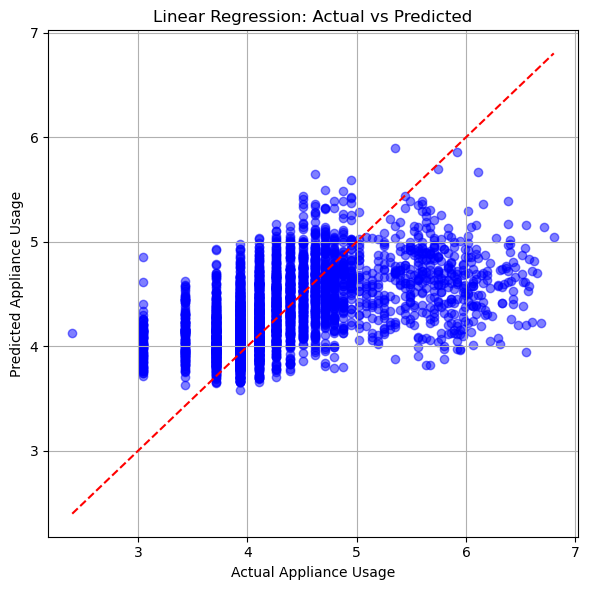

In [85]:
#Visualize with linear regression
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, lr_predictions, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Appliance Usage")
plt.ylabel("Predicted Appliance Usage")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


### DECISION TREE

In [87]:
from sklearn.tree import DecisionTreeRegressor

# Train
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
dt_predictions = dt_model.predict(X_test)

In [89]:
# Evaluate
print("Decision Tree Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, dt_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, dt_predictions):.2f}")
print(f"RMSE: {mean_squared_error(y_test, dt_predictions, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, dt_predictions):.2f}")


Decision Tree Evaluation:
MAE: 0.28
MSE: 0.21
RMSE: 0.46
R² Score: 0.50


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


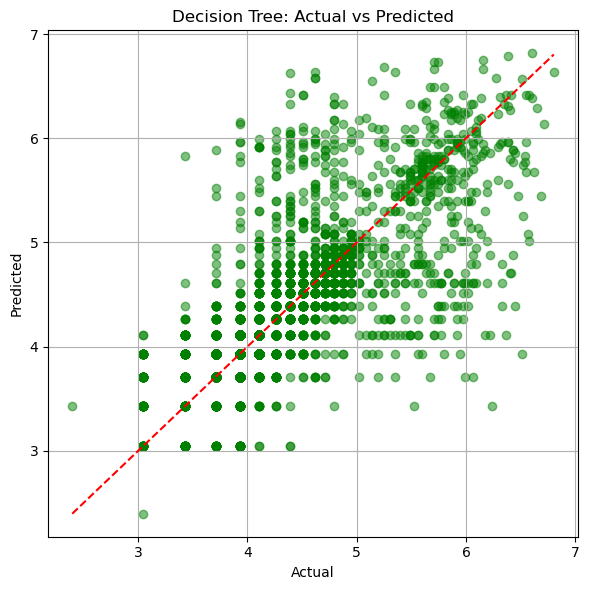

In [91]:
# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, dt_predictions, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Decision Tree: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


### RANDOM FOREST

In [93]:
from sklearn.ensemble import RandomForestRegressor

# Train
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
rf_predictions = rf_model.predict(X_test)

In [94]:
# Evaluate
print("Random Forest Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, rf_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, rf_predictions):.2f}")
print(f"RMSE: {mean_squared_error(y_test, rf_predictions, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, rf_predictions):.2f}")


Random Forest Evaluation:
MAE: 0.23
MSE: 0.12
RMSE: 0.34
R² Score: 0.72


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


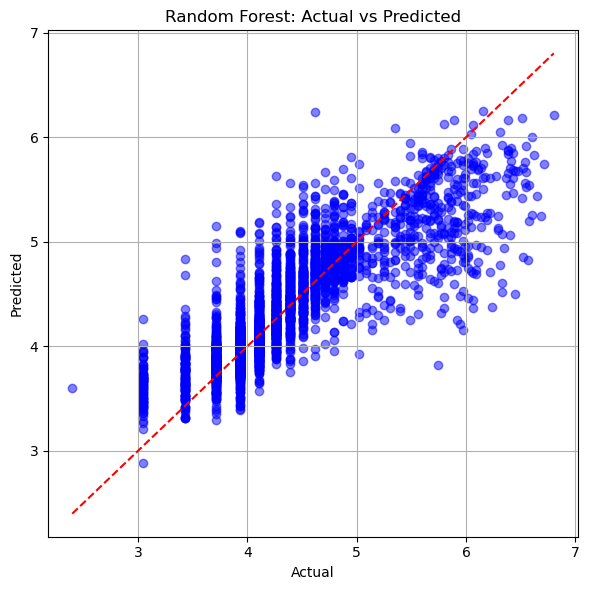

In [95]:
# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

### Gradientbooster Regression

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

# Train
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predict
gb_predictions = gb_model.predict(X_test)

In [101]:
# Evaluate
print("Gradient Boosting Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, gb_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, gb_predictions):.2f}")
print(f"RMSE: {mean_squared_error(y_test, gb_predictions, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, gb_predictions):.2f}")

Gradient Boosting Evaluation:
MAE: 0.33
MSE: 0.23
RMSE: 0.48
R² Score: 0.45


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


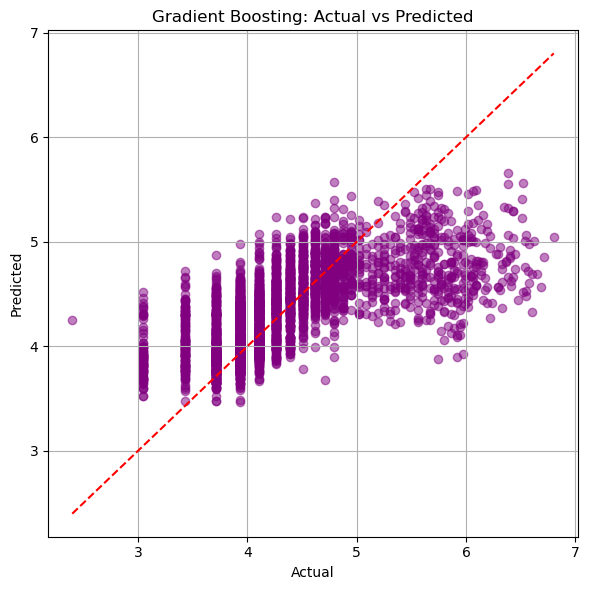

In [103]:
# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(y_test, gb_predictions, alpha=0.5, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()

### SUPPORT VECTOR REGRESSION

In [105]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# 1. Train SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train)

# 2. Predict
y_pred_svr = svr.predict(X_test_scaled)

In [107]:
# 3. Evaluate
print("Support Vector Regression (SVR) Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_svr):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_svr):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_svr, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred_svr):.2f}")


Support Vector Regression (SVR) Evaluation:
MAE: 0.25
MSE: 0.15
RMSE: 0.38
R² Score: 0.65


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


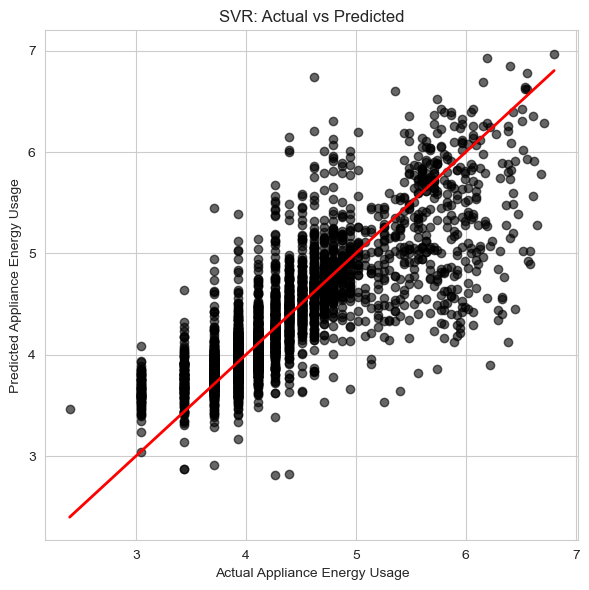

In [109]:
# 4. Visualize
plt.figure(figsize=(6, 6))
sns.set_style("whitegrid")
plt.scatter(y_test, y_pred_svr, color='black', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel("Actual Appliance Energy Usage")
plt.ylabel("Predicted Appliance Energy Usage")
plt.title("SVR: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


### Model Evaluation

In [111]:
# Define evaluation function
def evaluate_model(y_test, y_pred):
    return {
        'R² Score': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': mean_squared_error(y_test, y_pred, squared=False)
    }

# Store results for all models
results = {
    'Linear Regression': evaluate_model(y_test, lr_predictions),
    'Decision Tree': evaluate_model(y_test, dt_predictions),
    'Random Forest': evaluate_model(y_test, rf_predictions),
    'Gradient Boosting': evaluate_model(y_test, gb_predictions),
    'SVR': evaluate_model(y_test, y_pred_svr)
}

# Display as DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R² Score", ascending=False)
results_df


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

,R² Score,MSE,MAE,RMSE
Random Forest,0.716281,0.118656,0.228172,0.344465
SVR,0.647806,0.147294,0.249806,0.383789
Decision Tree,0.501108,0.208645,0.276066,0.456777
Gradient Boosting,0.445919,0.231726,0.332258,0.481380
Linear Regression,0.280326,0.300980,0.389582,0.548616


C:\Users\HP\AppData\Local\Temp\ipykernel_8\4284822222.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df_rounded.index, y="R² Score", data=results_df_rounded, palette="viridis")


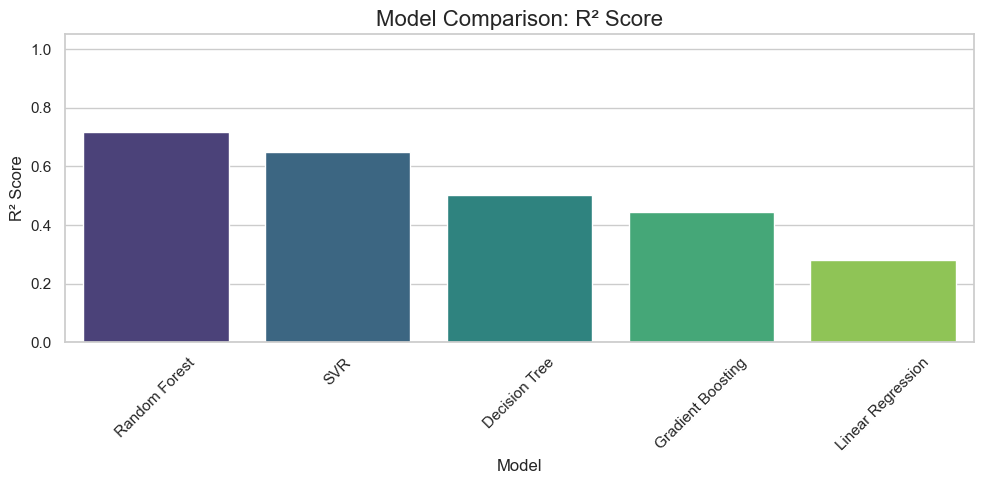

C:\Users\HP\AppData\Local\Temp\ipykernel_8\4284822222.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df_rounded.index, y="RMSE", data=results_df_rounded, palette="magma")


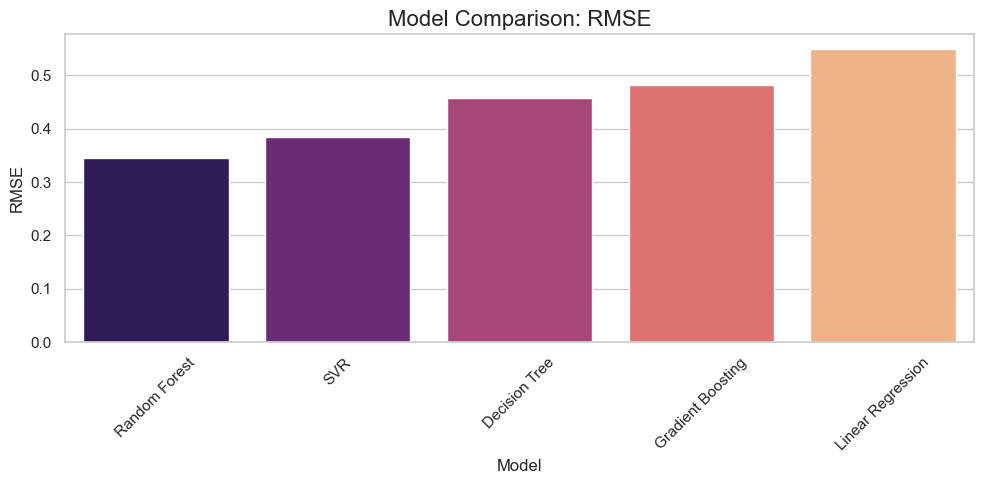

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: round values for cleaner visuals
results_df_rounded = results_df.round(4)

# Set style
sns.set(style="whitegrid")

# -------- Plot R² Score --------
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df_rounded.index, y="R² Score", data=results_df_rounded, palette="viridis")
plt.title("Model Comparison: R² Score", fontsize=16)
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------- Plot RMSE --------
plt.figure(figsize=(10, 5))
sns.barplot(x=results_df_rounded.index, y="RMSE", data=results_df_rounded, palette="magma")
plt.title("Model Comparison: RMSE", fontsize=16)
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### BEST PERFORMING MODEL

#### Random Forest Regressor is the best-performing model because it achieved the highest predictive accuracy (R²) and the lowest prediction errors (MAE, MSE, RMSE), making it both highly accurate and robust for energy consumption prediction.

In [115]:
baseline_mean = np.full_like(y_test, fill_value=y_test.mean())

print("Baseline (Mean) Evaluation:")
print("MAE:", mean_absolute_error(y_test, baseline_mean))
print("MSE:", mean_squared_error(y_test, baseline_mean))
print("R2 Score:", r2_score(y_test, baseline_mean))


Baseline (Mean) Evaluation:
MAE: 0.48256614170738393
MSE: 0.418217230953182
R2 Score: 0.0


### Feature importance from random forest

In [117]:
importances = rf_model.feature_importances_
features = X_train.columns

feat_importance = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)


          Feature  Importance
23           hour    0.267900
12             T8    0.065087
3              T3    0.051130
16    Press_mm_hg    0.046139
4            RH_3    0.042105
7            RH_5    0.038510
2            RH_1    0.034822
13           RH_8    0.034611
11           RH_7    0.033880
6            RH_4    0.032593
14             T9    0.031662
5              T4    0.031521
8              T6    0.028835
15          T_out    0.027639
10             T7    0.026514
1              T1    0.026471
19     lights_log    0.019759
24            day    0.019375
0          lights    0.018411
22     RH_out_log    0.018246
17         RH_out    0.017402
20       RH_6_log    0.017150
9            RH_6    0.017137
25        weekday    0.015964
18      Windspeed    0.013314
21  Windspeed_log    0.013179
26          month    0.010647


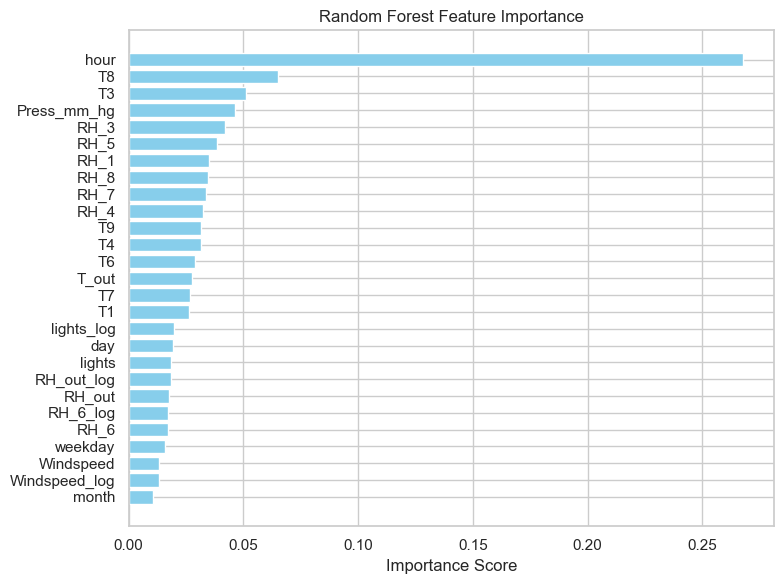

In [119]:
# Print table
print(feat_importance)


# Plot
plt.figure(figsize=(8, 6))
plt.barh(feat_importance['Feature'], feat_importance['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()  # So highest is on top
plt.tight_layout()
plt.show()


### FEATURE IMPORTANCE ANALYSIS

##The bar chart above shows the importance scores of each feature as determined by the Random Forest model. These scores indicate how much each feature contributes to predicting appliance energy usage.

##hour stands out as the most influential feature, suggesting that the time of day has a significant impact on energy consumption patterns.

##Other important features include T8 and T3, which are temperature sensors that may reflect indoor conditions.

##Features like month, weekday, and some humidity-related features (e.g., RH_6_log, RH_out_log) show relatively lower importance.

### HYPERPARAMTER TUNING

In [121]:
from sklearn.model_selection import GridSearchCV

In [131]:
param_grid_small = {
    'n_estimators': [50],
    'max_depth': [10, None],
    'min_samples_split': [2],
    'min_samples_leaf': [1, 2]
}


In [125]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

In [133]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='r2', verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='r2', verbose=2)

In [137]:

# Access the best parameters and best score AFTER fitting
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R2 Score: 0.6339168495142999


In [139]:
best_rf = grid_search.best_estimator_                       # after doing gridsearch and tuning we get the bset tree model with highest accuaracy score.
print("Best Parameters:", grid_search.best_params_)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


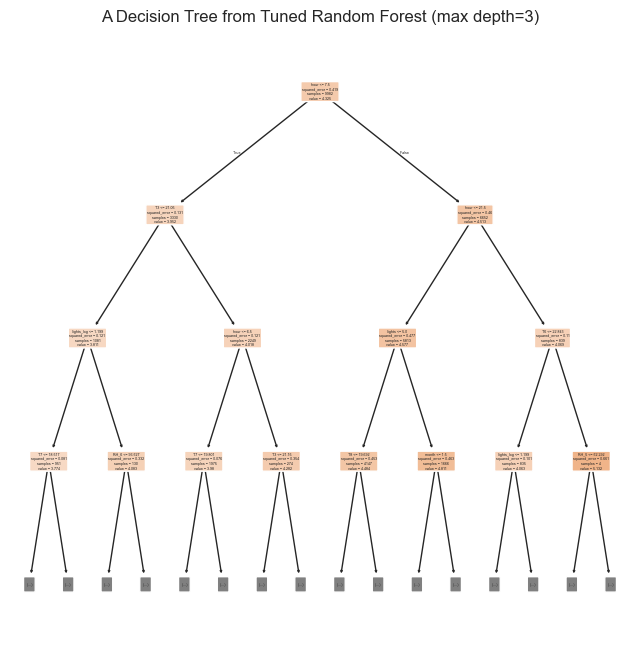

In [141]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

plot_tree(best_rf.estimators_[0],               
    feature_names=X_train.columns,        
    filled=True,                        
    rounded=True,                       
    max_depth=3                        
)
plt.title("A Decision Tree from Tuned Random Forest (max depth=3)")
plt.show()

### Prediction

In [143]:
y_pred_best = best_rf.predict(X_test)

In [145]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("After Tuning:")
print("R² Score:", r2_score(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("MAE:", mean_absolute_error(y_test, y_pred_best))

After Tuning:
R² Score: 0.716280642332481
MSE: 0.11865632413152524
MAE: 0.22817199924300666


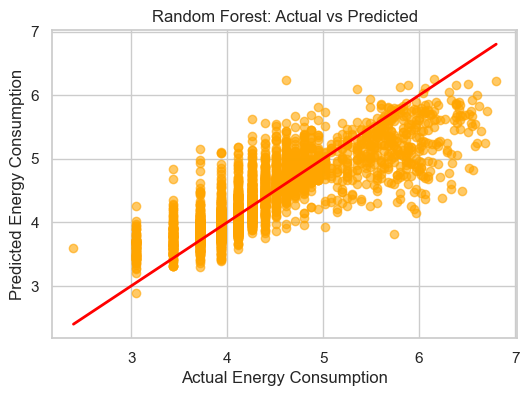

In [148]:

#  Normal Random Forest Model
RF = RandomForestRegressor(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
plt.scatter(y_test, y_pred_RF, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect prediction line
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


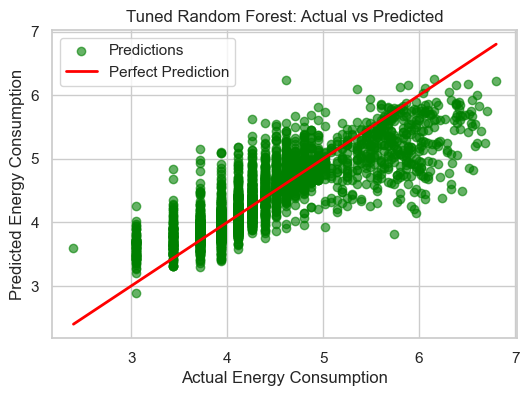

In [150]:
# Tuned Random Forest Model
y_pred_best = best_rf.predict(X_test)

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
plt.scatter(y_test, y_pred_best, color='green', alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Tuned Random Forest: Actual vs Predicted")
plt.legend()
plt.show()


###By comparing the plots of the default and tuned Random Forest models, it's evident that hyperparameter tuning enhances model performance. The tuned model exhibits fewer outliers and closer alignment with the ideal prediction line, resulting in higher accuracy.

### CONCLUSION


##In this project, we developed and evaluated several machine learning models to predict appliance energy consumption using a dataset of household energy use and environmental factors. The process involved comprehensive data preprocessing, feature engineering, model building, evaluation, and hyperparameter tuning.

##Among all models, the Random Forest Regressor—especially after hyperparameter tuning—performed the best, as shown by:

##High R² Score (indicating better explanation of variance)

##Low MAE, MSE, and RMSE (indicating high prediction accuracy)

##Clear alignment between actual vs predicted values in scatter plots

##Feature importance analysis showed that variables like hour of the day, T8, and T3 were most influential in predicting energy usage.

##The tuned model consistently outperformed the default versions and other models (like Linear Regression, Decision Tree, SVR, and Gradient Boosting), validating the importance of hyperparameter optimization.

